In [3]:
%load_ext autoreload
%autoreload 2


In [2]:
# read it back
import pickle
import gzip
with gzip.open('all_datasets.pkl.gz', 'rb') as f:
    all_datasets_loaded = pickle.load(f)   

In [4]:
from cluster.load_data import load_dataset_to_ram_optimized    
# ---------------------------------------------------------
# Main Logic
# ---------------------------------------------------------

# Container for your completely in-memory datasets
# Structure: memory_datasets[ds_name][config][split]
dataset_to_load = ['calo_hits', 'particles', 'tracks']
memory_datasets = {}

# iterate over the 'all_datasets' dict you created in your download script
for ds_name, configs in all_datasets_loaded.items():
    memory_datasets[ds_name] = {}
    
    for cfg_name, dataset_dict in configs.items():
        memory_datasets[ds_name][cfg_name] = {}
        print(f"\n=== Processing {ds_name} / {cfg_name} ===")
        if cfg_name not in dataset_to_load:
            print(f"Skipping config: {cfg_name}")
            continue
        # dataset_dict contains splits like 'train', 'validation', etc.
        for split_name, original_ds in dataset_dict.items():
            print(f"Loading split: {split_name}")
            
            # 1. Get the file paths from the existing dataset object
            # (The attribute is typically a list of dicts provided by the backend)
            target_files = original_ds.cache_files
            
            # 2. Load them into RAM
            ram_ds = load_dataset_to_ram_optimized(target_files)
            

            memory_datasets[ds_name][cfg_name][split_name] = ram_ds
            print(f"  -> Success! Loaded {len(ram_ds)} rows into RAM.")
   

print("\n===============================================")
print("ALL DATA LOADED TO RAM.")
print("Access example: memory_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['particles']['train'][0]")


=== Processing OpenDataDetector/ColliderML_ttbar_pu0 / particles ===
Loading split: train
Loading: collider_ml_ttbar_pu0-train-00000-of-00100.arrow
Concatenating in memory...
  -> Success! Loaded 1000 rows into RAM.

=== Processing OpenDataDetector/ColliderML_ttbar_pu0 / tracker_hits ===
Skipping config: tracker_hits

=== Processing OpenDataDetector/ColliderML_ttbar_pu0 / calo_hits ===
Loading split: train
Loading: collider_ml_ttbar_pu0-train-00000-of-00100.arrow
Loading: collider_ml_ttbar_pu0-train-00001-of-00100.arrow
Concatenating in memory...
  -> Success! Loaded 1950 rows into RAM.

=== Processing OpenDataDetector/ColliderML_ttbar_pu0 / tracks ===
Loading split: train
Loading: collider_ml_ttbar_pu0-train-00000-of-00002.arrow
Concatenating in memory...
  -> Success! Loaded 87000 rows into RAM.

ALL DATA LOADED TO RAM.
Access example: memory_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['particles']['train'][0]


Processing first 100 events for histogram...


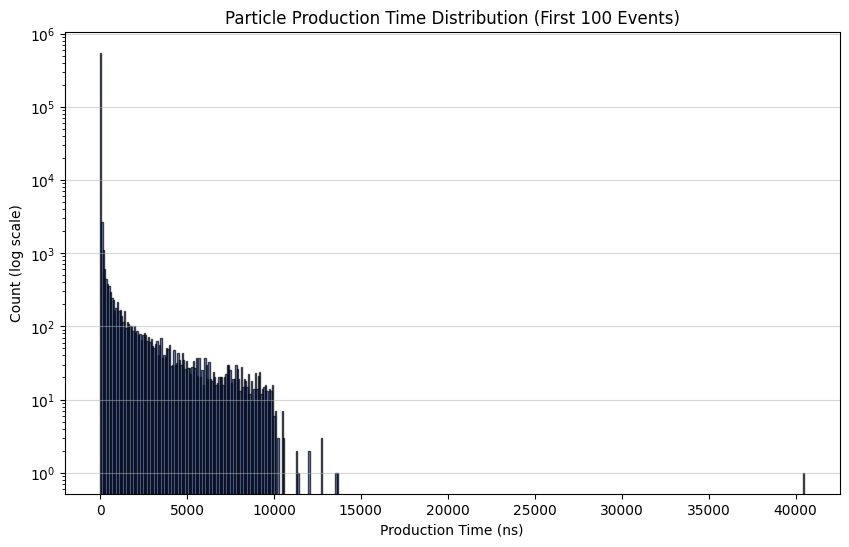

Total particles plotted: 558678
Mean time: 45.8918 ns
Max time:  40512.1602 ns


In [13]:
from cluster.plot import plot_production_time_histogram
plot_production_time_histogram(memory_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['particles']['train'], n_events=100, bins=500, log_scale=True)

In [20]:
particles = memory_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['particles']['train']
calo_hits = memory_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['calo_hits']['train']
tracks = memory_datasets['OpenDataDetector/ColliderML_ttbar_pu0']['tracks']['train']

In [22]:
from primary.preprocessing import add_orphan_mask, cast_parent_id_to_int64
particles = cast_parent_id_to_int64(particles)
particles = add_orphan_mask(particles)

Computing parent existence mask...


In [32]:
particles[0]['is_parent_missing'][0][90:]

""
bool
false
false
false
false
false
…
false
false
false
